In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import math

from constants import DATA_DIR, PERSPECTIVE_API_ATTRIBUTES_LOWER

In [3]:
db_path = DATA_DIR / 'perspective-responses-v2.db'
engine = create_engine(f'sqlite:///{db_path}', echo=False)

def hist_df(table, col, rnd=2):
    query = f"""
        SELECT count(*), ROUND({col}, {rnd})
        FROM {table}
        GROUP BY ROUND({col}, {rnd});
        """
    return pd.read_sql(query, con=engine)

In [68]:
def plot_all(dfs, title):
    dfs_list = list(dfs.items())

    ncols = 2
    fig, ax = plt.subplots(nrows=math.ceil(len(dfs) / ncols),
                           ncols=ncols,
                           sharex=True,
                           figsize=(16, ncols * len(dfs)))

    i = 0
    for row in ax:
        for col in row:
            attr, df = dfs_list[i]
            y, x = df.values.T
            col.hist(x, bins=x, weights=y)
            col.title.set_text(attr)
            i += 1

## Documents

In [35]:
doc_dfs = {attr: hist_df('responses', attr) for attr in PERSPECTIVE_API_ATTRIBUTES_LOWER}

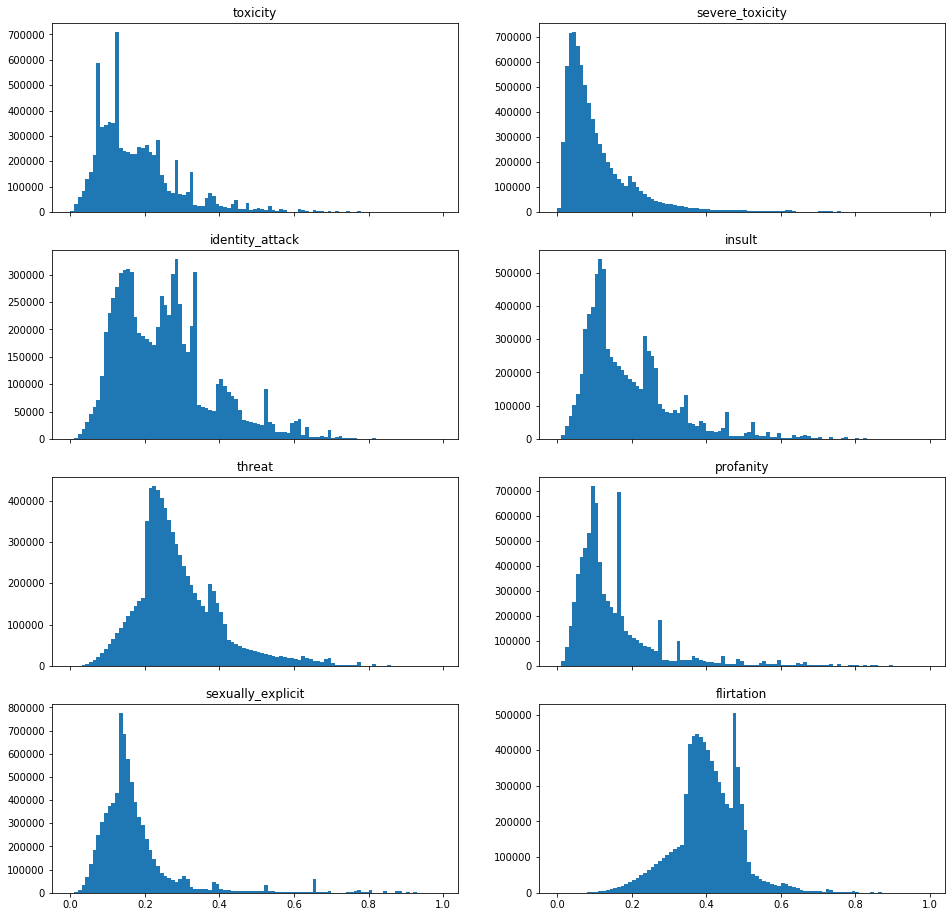

In [69]:
plot_all(doc_dfs)

## Spans

In [ ]:
span_dfs = {attr: hist_df('span_scores', attr) for attr in PERSPECTIVE_API_ATTRIBUTES_LOWER}

In [ ]:
plot_all(span_dfs)